## Automated Surface Event Detection from Seismograms
Author: Akash Kharita
    
This notebook demonstrates how to use my machine learning model to detect surface events (snow avalanches/rockfalls/debris flows) through continuous seismograms from multiple station. We will take examples of verified events and see how my model/detector behaves around the event. 


Feel free to run this model on the starttimes and durations you would like!

## Importing dependencies


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import yaml
import obspy
import matplotlib.lines as mlines


## Defining some helper functions

In [2]:
st_overall_data = []
st_overall_times = []
st_overall = []
result_stns = []
index_stns = []
prob_stns = []



def plot_detection_results(st_overall_data = st_overall_data, st_overall_times = st_overall_times, st_overall = st_overall, result_stns = result_stns, index_stns = index_stns, prob_stns = prob_stns, xlim = [0,300], ev_markers = [60,300]):
    plt.rcParams['xtick.labelsize'] = 16  # Font size for xtick labels
    plt.rcParams['ytick.labelsize'] = 20  # Font size for ytick labels

    fig, axs = plt.subplots(len(st_overall_data), 1, figsize=(15, 3*len(st_overall_data)))

    for k in range(len(st_overall_data)):

        ## This is plotting the normalized data
        axs[k].plot(st_overall_times[k], st_overall_data[k] / np.max(abs(st_overall_data[k])))

        ## Setting the title of the plot
        axs[k].set_title(st_overall[k][0].id, fontsize=20)

        ## These are the colors of detection window. 
        colors = ['black', 'blue', 'white', 'red']
        for i in range(len(index_stns[k])):
            axs[k].axvline(30 * index_stns[k][i] + 75, ls='--', color=colors[int(result_stns[k][i])], alpha = 0.6)
            
        # Plot circles on top of the line plot
        for i in range(len(index_stns[k])):
            if result_stns[k][i] == 3:
                axs[k].scatter(30 * np.array(index_stns[k])[i] + 75, np.array(prob_stns[k])[:, :, 3][i], ec='k', marker='o', c='red', s=100, zorder=5)
            elif result_stns[k][i] == 0:
                axs[k].scatter(30 * np.array(index_stns[k])[i] + 75, np.array(prob_stns[k])[:, :, 3][i], ec='k', marker='o', c='black', s=100, zorder=5)
            elif result_stns[k][i] == 1:
                axs[k].scatter(30 * np.array(index_stns[k])[i] + 75, np.array(prob_stns[k])[:, :, 3][i], ec='k', marker='o', c='blue', s=100, zorder=5)
            else:
                axs[k].scatter(30 * np.array(index_stns[k])[i] + 75, np.array(prob_stns[k])[:, :, 3][i], ec='k', marker='o', c='white', s=100, zorder=5)

        # Create custom legend for circular markers
        legend_elements = [
            mlines.Line2D([], [], marker='o', color='red', label='Prob (Su)', markersize=10)
        ]
        axs[k].legend(handles=legend_elements, loc='upper right', fontsize=12)

        axs[k].set_xlabel('Time(s) since ' + str(starttime).split('.')[0], fontsize=20)
        axs[k].set_xlim(xlim[0], xlim[1])  # Set x-axis limits if needed
        axs[k].axvline(ev_markers[0], ls = '-', c = 'k', lw = 2)
        axs[k].axvline(ev_markers[1], ls = '-', c = 'k', lw = 2)
        
        
    plt.tight_layout()  # Adjust subplots to avoid overlap
    plt.show()


## Importing the surface event detection code

In [3]:
from Automated_Surface_Event_Detection import surface_event_detection

Title: Trained Machine Learning Model to Detect Surface Events from Seismograms
Keywords: 
Publication date: 2024-04-23
DOI: 10.5281/zenodo.11043908
Total size: 102.7 MB

Link: https://zenodo.org/record/11043908/files/best_rf_model_top_50_features_50_100.joblib   size: 102.7 MB

Checksum is correct. (84af7f1738c254475462aee5d3d9de60)
All files have been downloaded.


File 'best_rf_model_top_50_features_50_100.joblib' removed successfully.


![Mount Rainier Stations](../Extras/Cover_Image.png)


![Mount Rainier Glaciers](../Extras/Mt_Rainier_Glaciers.png)

## First We will try our surface event detector to detect a snow avalanche that occurred on Carbon Glacier, Mount Rainier. 

This event is present in IRIS ESEC - https://ds.iris.edu/spud/esec/20011713 and we can also see a video of the event here - https://www.facebook.com/100003168843736/videos/2824127924369475/


- Event type: Snow Avalanche
- Start Date: 	2020-04-09 13:28:41
- End Date: 2020-04-09 13:29:54
- Location: Carbon Glacier


In [4]:
# startttime of trace
starttime = obspy.UTCDateTime(2020, 4, 9, 13, 28, 41) - 60

# duration
dur = 600

# stations ID
stations_id = ['UW.STAR', 'UW.RCS', 'UW.RCM', 'CC.OBSR']
result_stns, index_stns, prob_stns, st_overall, st_overall_data, st_overall_times = surface_event_detection(starttime = starttime, stations_id = stations_id, dur = dur)

100%|██████████| 20/20 [00:00<00:00, 244565.83it/s]

100%|██████████| 20/20 [00:00<00:00, 248183.67it/s]

100%|██████████| 20/20 [00:00<00:00, 241051.95it/s]

100%|██████████| 20/20 [00:00<00:00, 207638.81it/s]

100%|██████████| 4/4 [00:17<00:00,  4.37s/it]


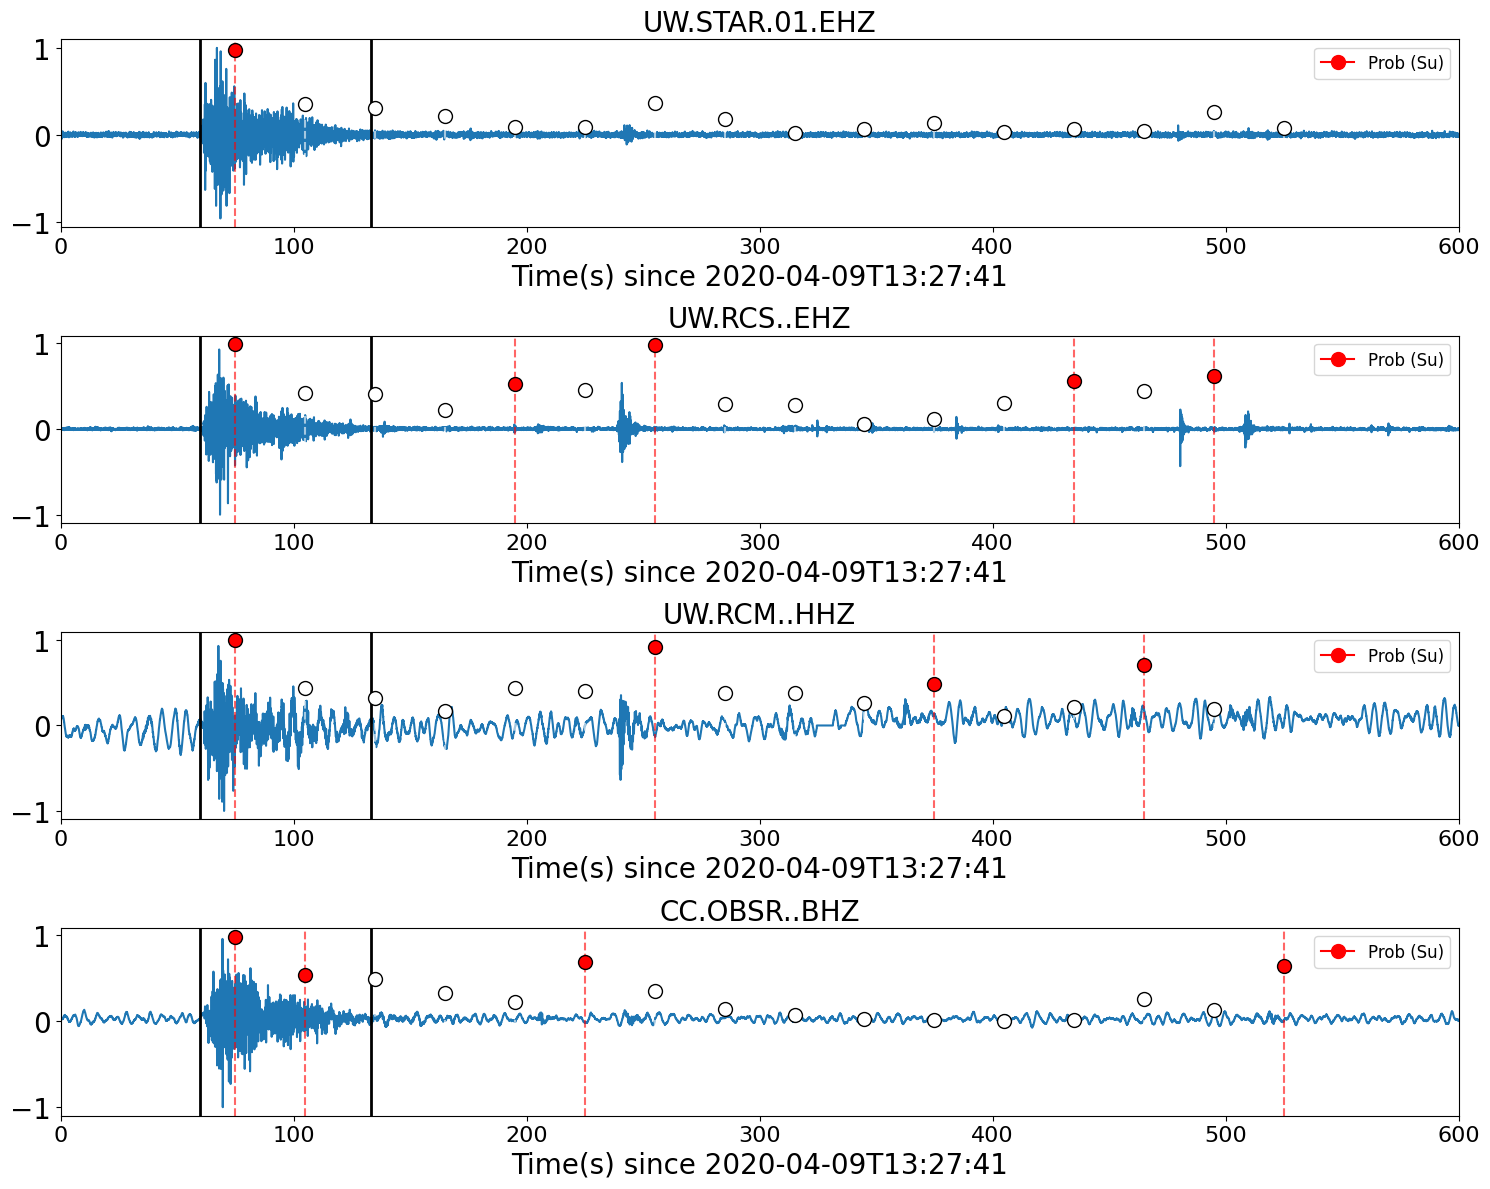

In [5]:
plot_detection_results(st_overall_data = st_overall_data, 
                       st_overall_times = st_overall_times, 
                       st_overall = st_overall, result_stns = result_stns, 
                       index_stns = index_stns, 
                       prob_stns = prob_stns,
                       xlim = [0,600], 
                       ev_markers = [60, 133])

## Second We will try our surface event detector to detect a Icefall and Ice Avalanche that occurred on  Nisqually Glacier, Mount Rainier. 

This event is present in IRIS ESEC - https://ds.iris.edu/spud/esec/14743775 and we can also see a video of the event here - https://www.youtube.com/watch?v=iDle-31t238


- Event type: Rockfall, Rock and Ice Avalanche
- Start Date: 	2011-06-25 23:04:05
- End Date: 2011-06-25 23:11:15
- Location: Nisqually Glacier


In [6]:
# startttime of trace
starttime = obspy.UTCDateTime(2011, 6, 25, 23, 4, 5) - 60

# duration
dur = 600

# stations ID
stations_id = [ 'UW.RCS', 'UW.RCM', 'CC.PARA', 'CC.COPP', 'CC.PANH', 'CC.OBSR']
result_stns, index_stns, prob_stns, st_overall, st_overall_data, st_overall_times = surface_event_detection(starttime = starttime, stations_id = stations_id, dur = dur)

100%|██████████| 21/21 [00:00<00:00, 279620.27it/s]

100%|██████████| 21/21 [00:00<00:00, 337472.74it/s]

100%|██████████| 21/21 [00:00<00:00, 353736.48it/s]

100%|██████████| 21/21 [00:00<00:00, 334906.40it/s]

100%|██████████| 6/6 [00:19<00:00,  3.29s/it]


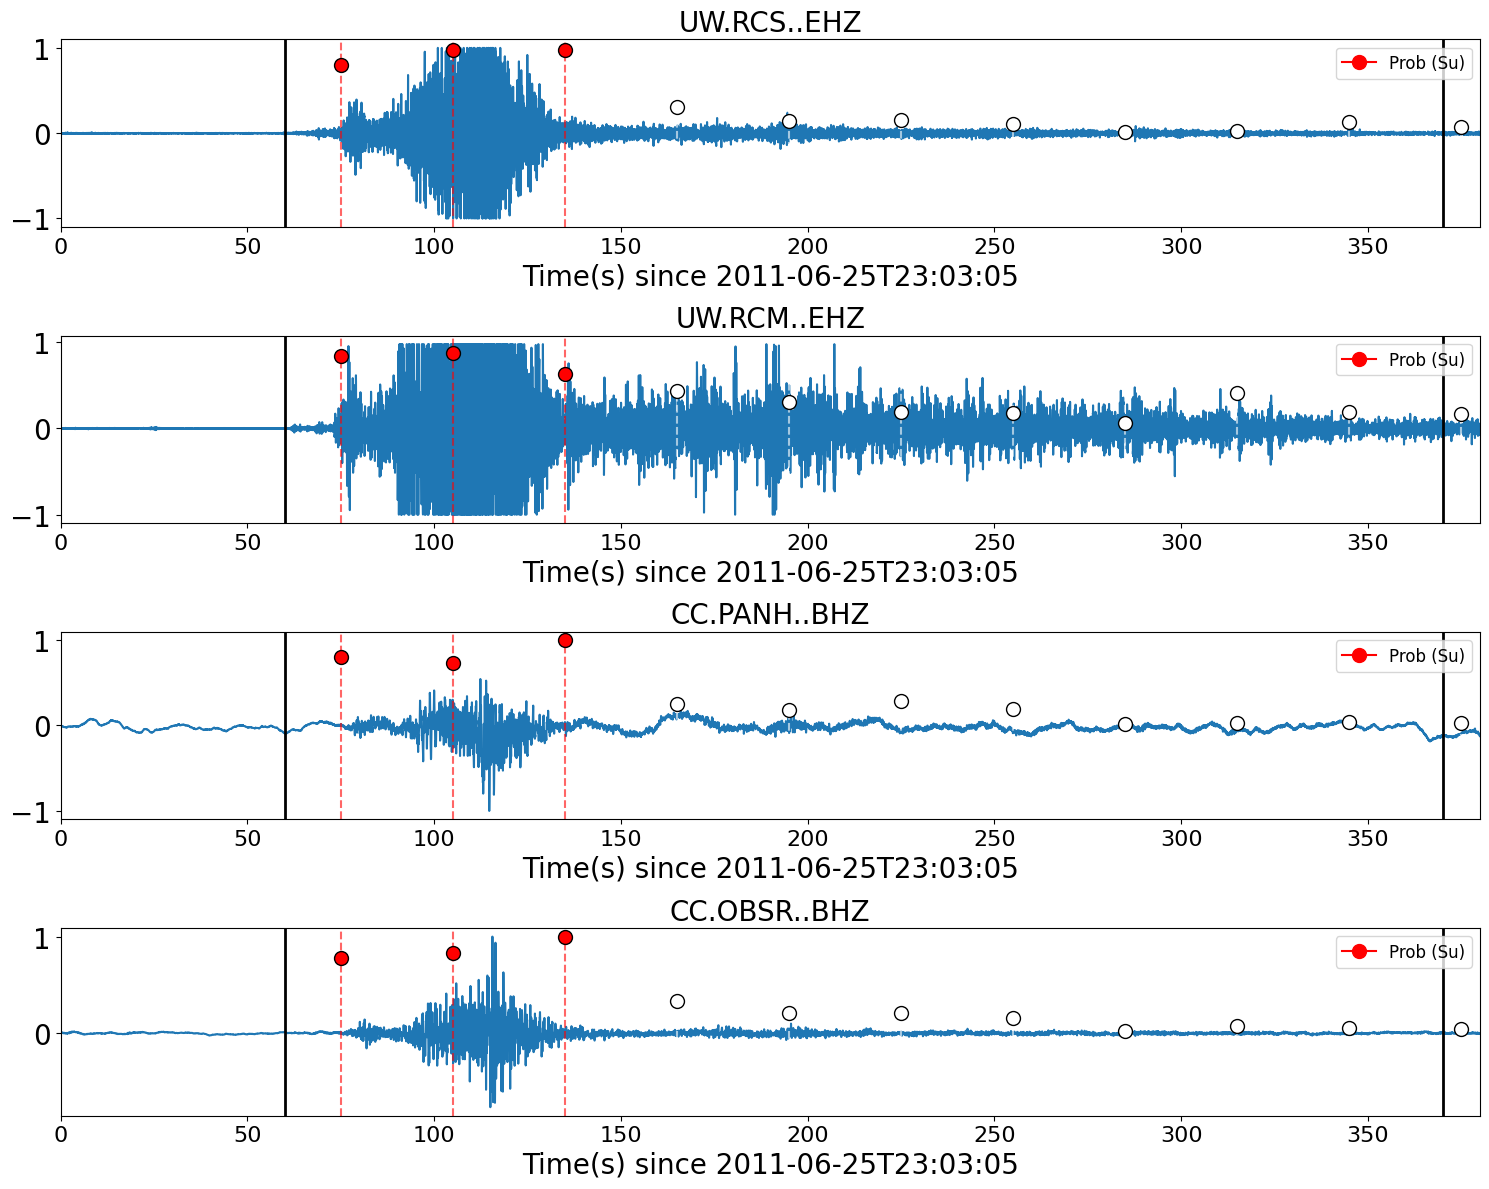

In [7]:
plot_detection_results(st_overall_data = st_overall_data, 
                       st_overall_times = st_overall_times, 
                       st_overall = st_overall, 
                       result_stns = result_stns, 
                       index_stns = index_stns, 
                       prob_stns = prob_stns, 
                       xlim = [0,380], 
                       ev_markers = [60, 370])

## Third We will try our surface event detector to detect a Debris Flow that occurred on  Nisqually Glacier, Mount Rainier. 

This event is present in IRIS ESEC - https://ds.iris.edu/spud/esec/20008839 and we can also see more info of the event here - 


- Event type: Debris Flow
- Start Date: 	2019-09-27 00:43:20
- End Date: 	2019-09-27 01:29:22
- Location: Mount Rainier


In [8]:
# startttime of trace
starttime = obspy.UTCDateTime(2019, 9, 27, 0, 43, 20) - 60

# duration
dur = 60*60

# stations ID
stations_id = [ 'UW.LON', 'UW.RER','UW.LO2', 'UW.RCS', 'UW.RCM', 'UW.STAR', 'CC.PARA', 'CC.MIRR', 'CC.TABR']
result_stns, index_stns, prob_stns, st_overall, st_overall_data, st_overall_times = surface_event_detection(starttime = starttime, stations_id = stations_id, dur = dur)

100%|██████████| 121/121 [00:00<00:00, 719873.45it/s]

100%|██████████| 120/120 [00:00<00:00, 696150.04it/s]

100%|██████████| 120/120 [00:00<00:00, 708896.45it/s]

100%|██████████| 120/120 [00:00<00:00, 670195.05it/s]

100%|██████████| 121/121 [00:00<00:00, 702923.52it/s]

100%|██████████| 240/240 [00:00<00:00, 829186.95it/s]

100%|██████████| 9/9 [03:10<00:00, 21.15s/it]


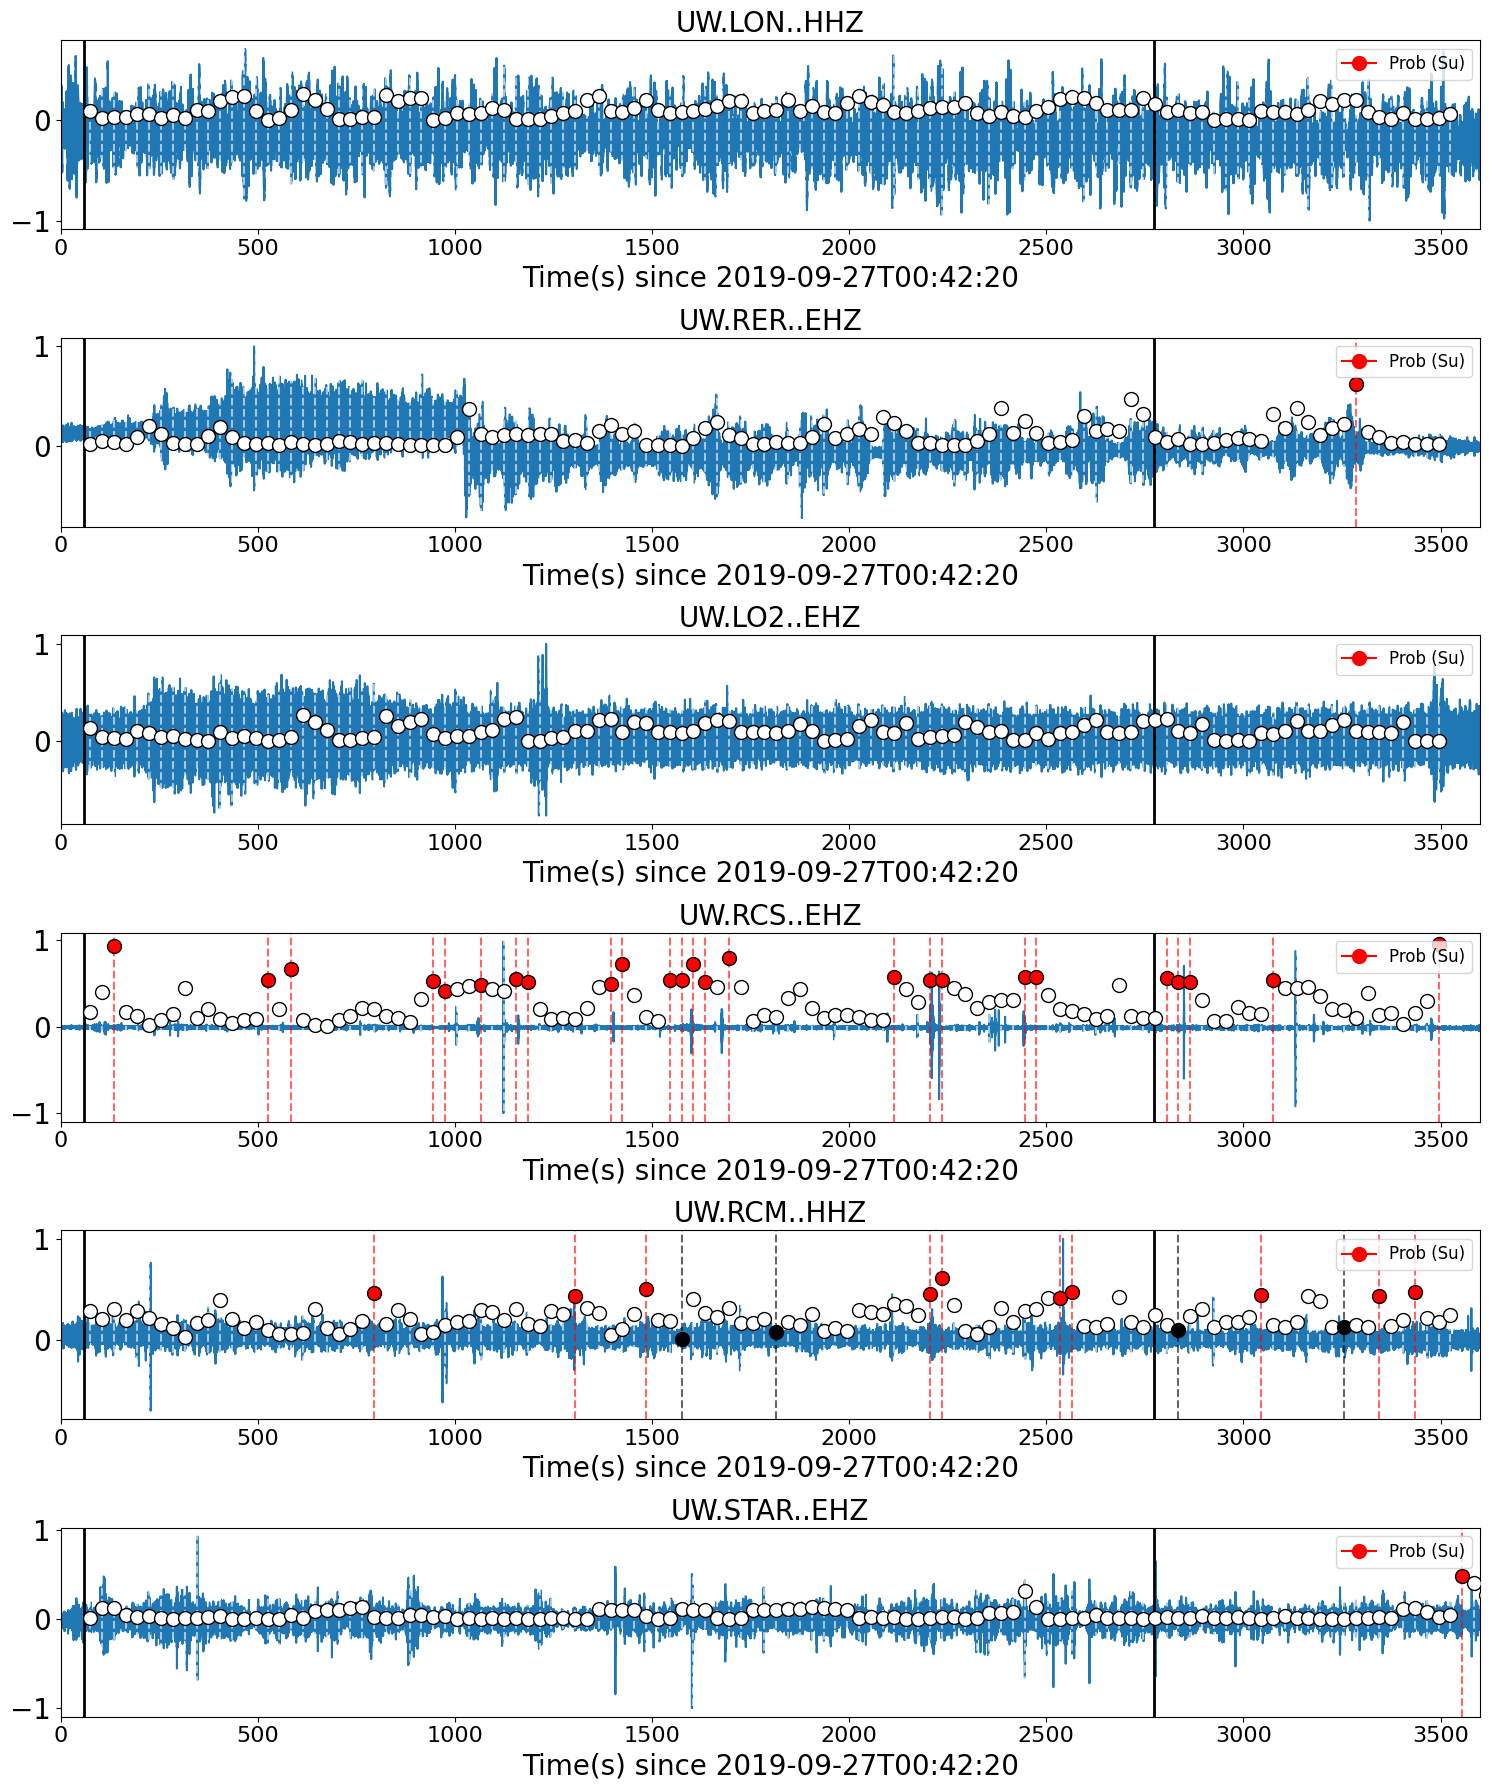

In [9]:
plot_detection_results(st_overall_data = st_overall_data, 
                       st_overall_times = st_overall_times, 
                       st_overall = st_overall, 
                       result_stns = result_stns, 
                       index_stns = index_stns, 
                       prob_stns = prob_stns, 
                       xlim = [0,3600],ev_markers = [60, 2772])





## Now try running seismograms around surface events of your interest and see how it behaves!

In [12]:
# startttime of trace
starttime = obspy.UTCDateTime(2023, 8, 15, 23, 22, 0) - 60

# duration
dur = 60*60

# stations ID
stations_id = [ 'UW.RER', 'UW.RCM', 'UW.STAR', 'CC.TAVI', 'CC.GTWY', 'CC.WOW', 'CC.TABR']
result_stns, index_stns, prob_stns, st_overall, st_overall_data, st_overall_times = surface_event_detection(starttime = starttime, stations_id = stations_id, dur = dur)

100%|██████████| 121/121 [00:00<00:00, 645688.02it/s]

100%|██████████| 121/121 [00:00<00:00, 672199.71it/s]

100%|██████████| 119/119 [00:00<00:00, 695156.23it/s]

100%|██████████| 121/121 [00:00<00:00, 675780.01it/s]

100%|██████████| 121/121 [00:00<00:00, 692374.88it/s]

100%|██████████| 121/121 [00:00<00:00, 533660.13it/s]

100%|██████████| 121/121 [00:00<00:00, 713798.57it/s]

100%|██████████| 7/7 [03:03<00:00, 26.27s/it]


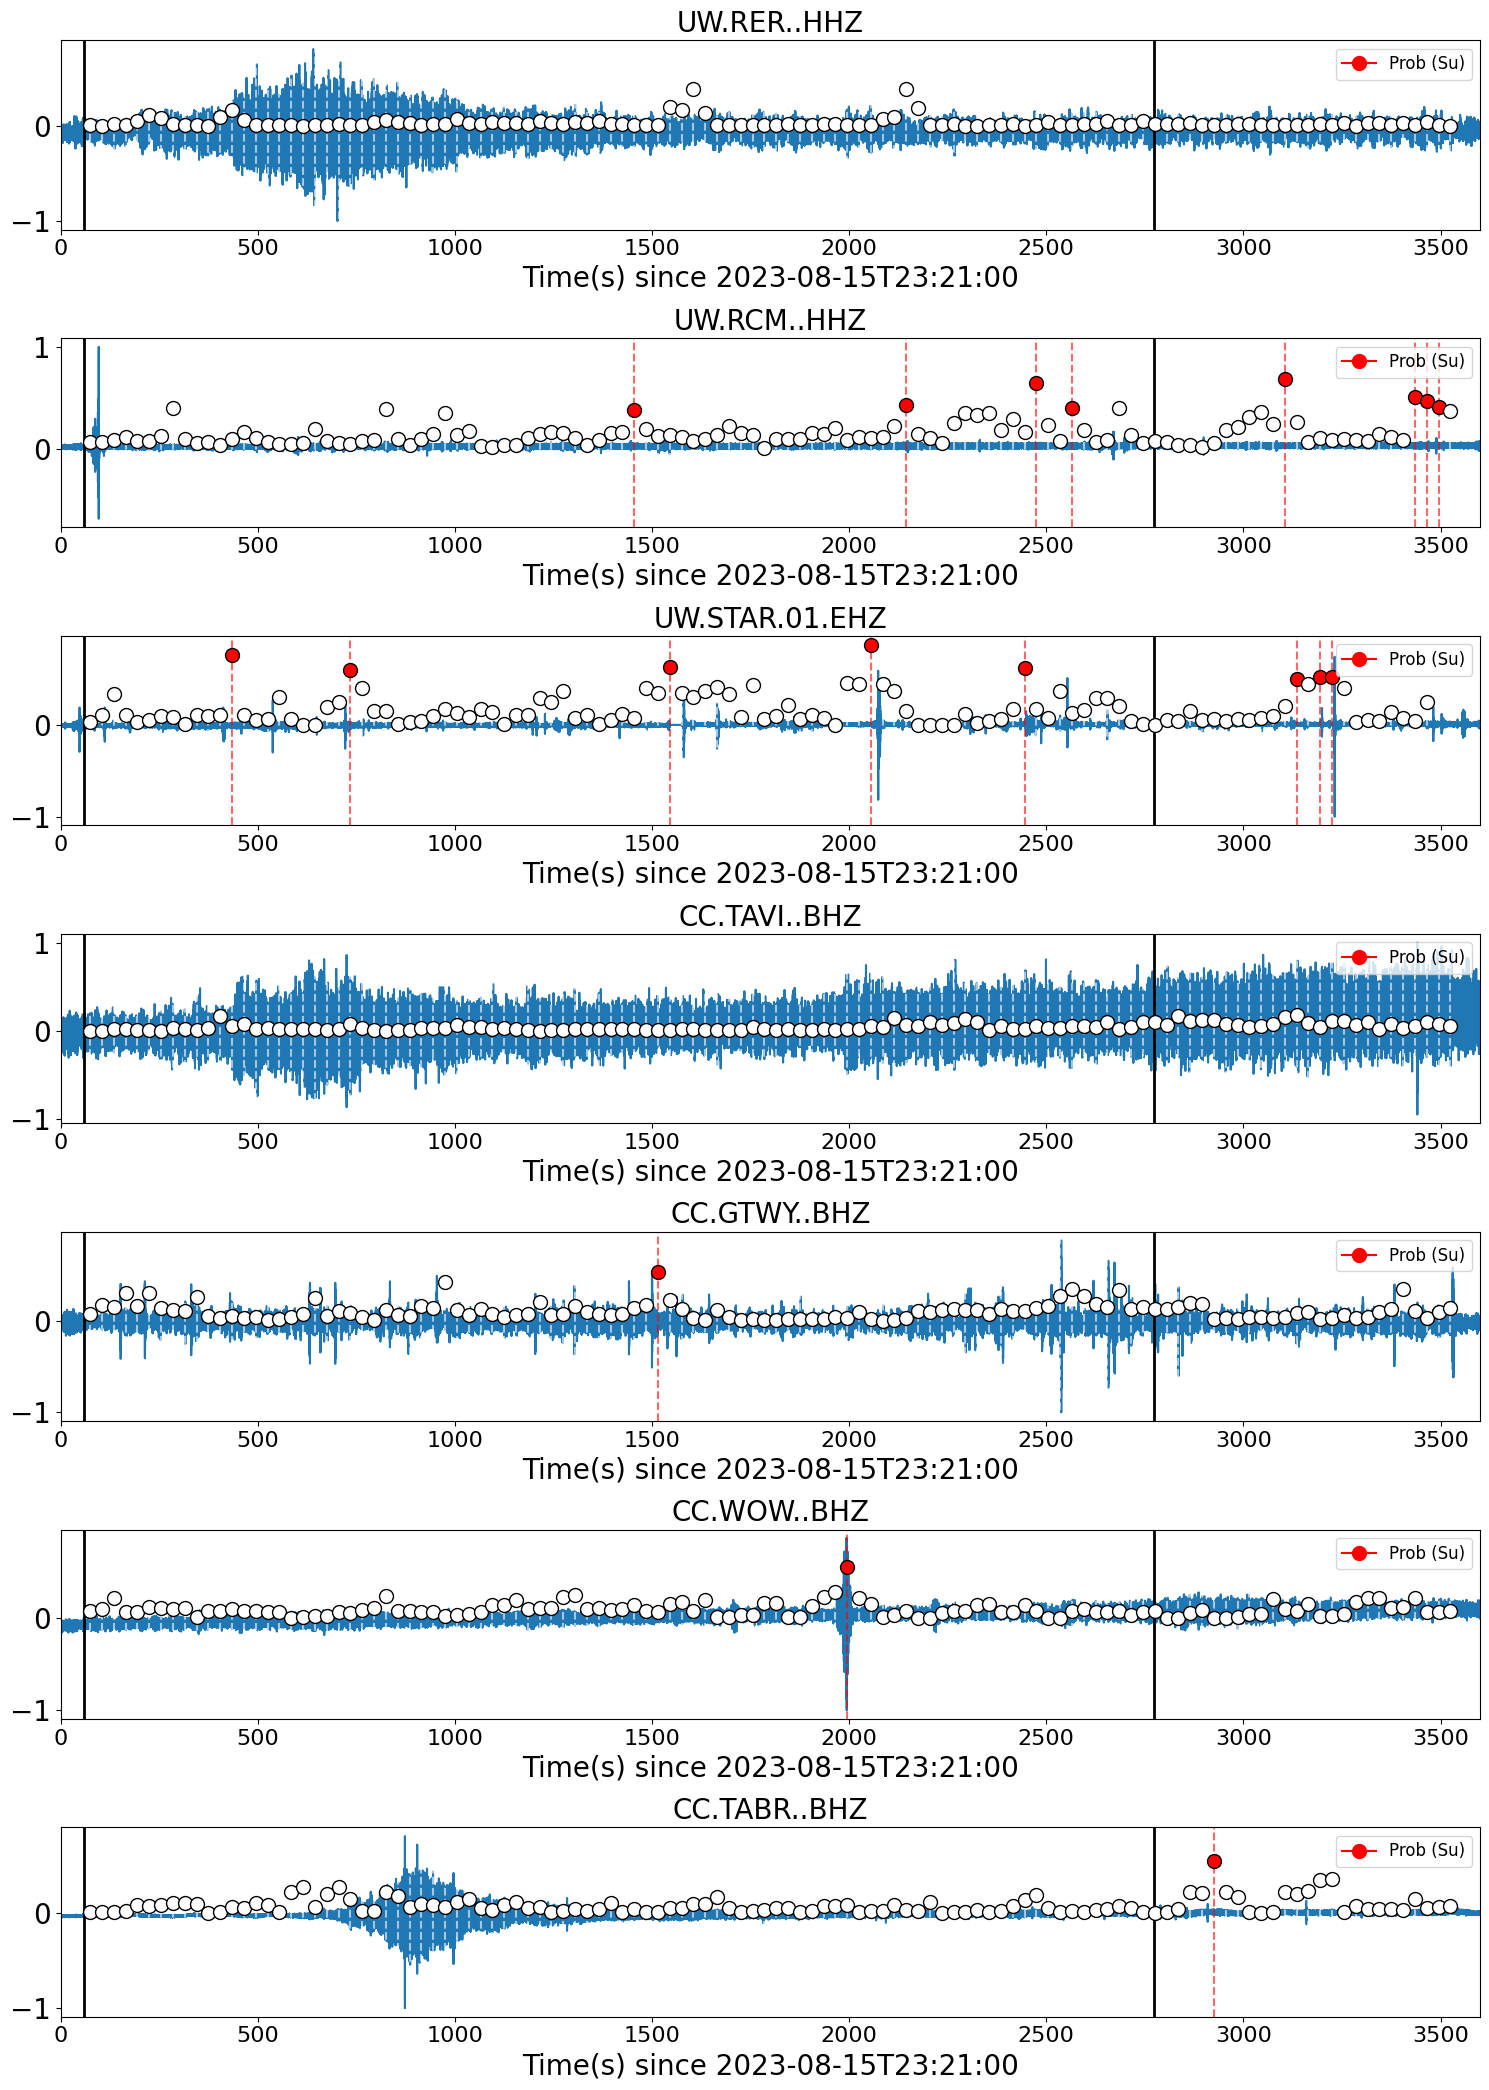

In [13]:
plot_detection_results(st_overall_data = st_overall_data, 
                       st_overall_times = st_overall_times, 
                       st_overall = st_overall, 
                       result_stns = result_stns, 
                       index_stns = index_stns, 
                       prob_stns = prob_stns, 
                       xlim = [0,3600],ev_markers = [60, 2772])
